<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp9/exp9_cslg_plotting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

Focusing the distance of the feature masking clusters.

> This notebook is for experiment \<exp9\> and data sample \<cslg\>.

### Initialization

In [177]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/exp9/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data

In [178]:
sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import get
from feature_masking import masking_options

sample_data_and_config_arr = get('exp9', 'cslg')

for sample_data_and_config in sample_data_and_config_arr:
    y_values = []
    sample_origin_npy = sample_data_and_config['origin']
    for array in sample_data_and_config['feature_stack']:

        # define your y axis value here
        # y_value = np.absolute((sample_origin_npy - array) / sample_origin_npy)
        y_value = (array)
        y_values.append(y_value)

    y_values = np.array(y_values)
    sample_data_and_config['y_values'] = y_values

def get_sample_data_and_config(sample_name, query, task_number):
    for config in sample_data_and_config_arr:
        if config.get('sample_and_task_name') == sample_name and config.get('query') == query and config.get('task_number') == task_number:
            return config

Got sample data: cslg


### Plot PDP of Title

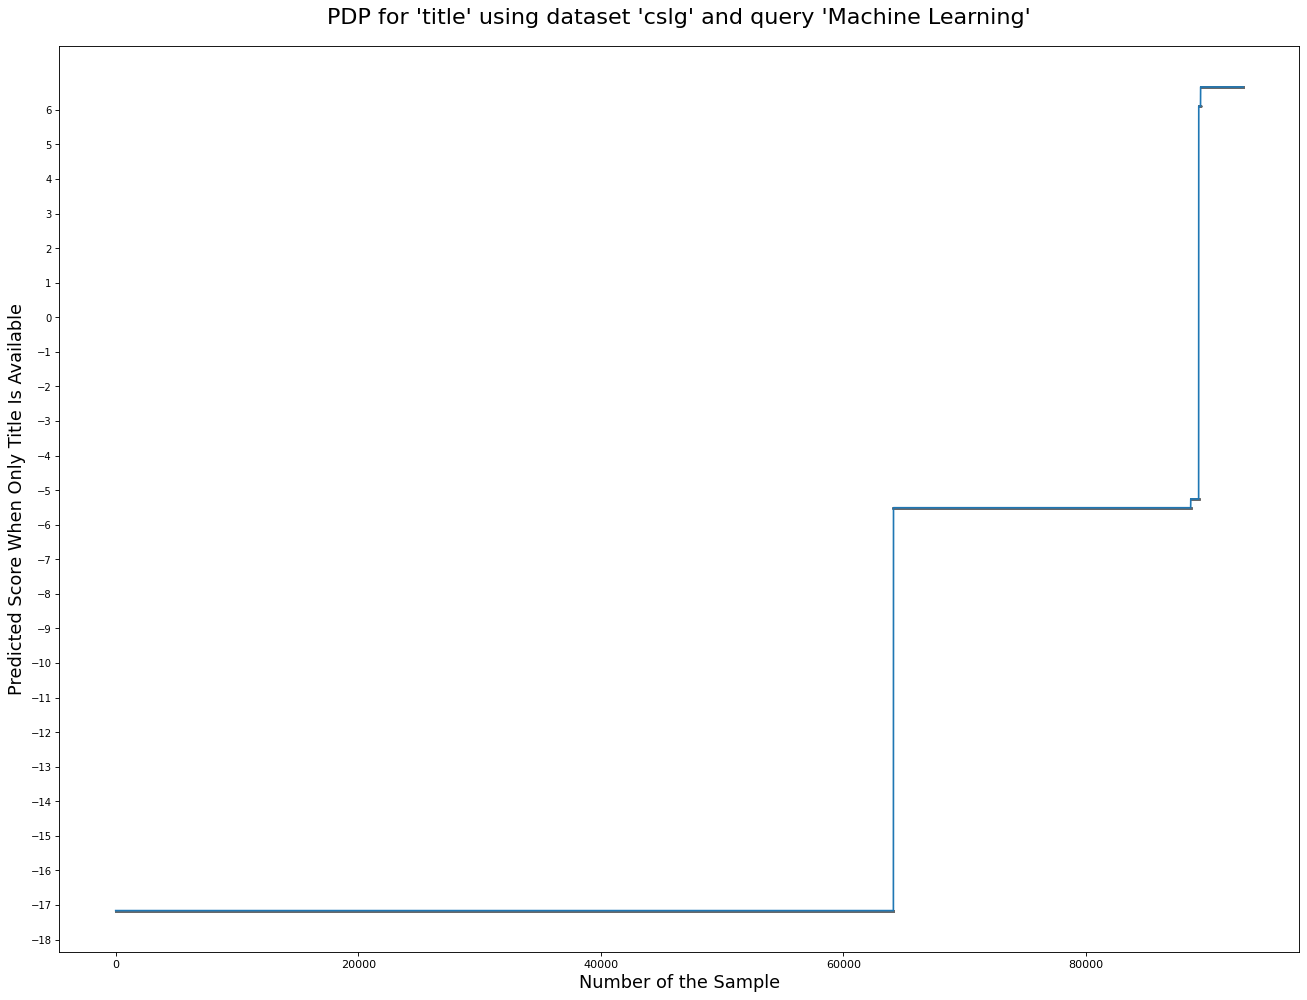

In [179]:
import matplotlib.pyplot as plt
def plot_pdp_title(sample_name, y_values, query): 
  plt.figure(figsize=(20, 15), dpi=80)

  x = list(range(1, len(y_values[0]) + 1))
  y = np.sort(y_values[0])
  plt.scatter(
    x,
    y,
    s=1,
    c=masking_options['absvauyc']['color'], 
    marker='o',
  )
  plt.plot(x, y)

  plt.xlabel('Number of the Sample',fontsize=16)
  plt.ylabel('Predicted Score When Only Title Is Available', fontsize=16)
  plt.title(f'PDP for \'title\' using dataset \'{sample_name}\' and query \'{query}\'', fontsize=20, pad=20)
  y_max = 7
  y_min = -18
  y_pace = 1
  plt.yticks(np.arange(y_min, y_max, y_pace), size = 9)
  plt.savefig(os.path.join('.', 'plot', f'{sample_name}.png'), facecolor='white', transparent=False)
  plt.show()

pdp_title_data_and_config = get_sample_data_and_config('cslg', 'Machine Learning', 1)

plot_pdp_title('cslg', pdp_title_data_and_config.get('feature_stack'), pdp_title_data_and_config.get('query'))